## Diabetes Risk Factors (environmental and lifestyle)

In [32]:
import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, minmax_scale 

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings


In [5]:
df = pd.read_csv('Data/diabetes_prediction_dataset.csv')

In [9]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.drop_duplicates(inplace = True)
print('Number of Duplicates: {:,}'.format(df.duplicated().sum()))


Number of Duplicates: 0


In [11]:
df = df[~(df['gender']=='Other')]

# Data Preprocession

In [12]:
df["diabetes"].unique()

array([0, 1], dtype=int64)

In [13]:
df["diabetes"].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

In [14]:
label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [15]:
X = df.iloc[:,0:9]
X = X.dropna()
print(type(X))

Y = df.iloc[:,-1]

Y

<class 'pandas.core.frame.DataFrame'>


0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96128, dtype: int64

In [16]:
X['gender'] = label_encoder.fit_transform(X["gender"])
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [17]:
# OneHotEncoding

features = ['smoking_history']

encoder = OneHotEncoder()

X_encode = pd.DataFrame(encoder.fit_transform(X[features]).toarray(),
                          columns=encoder.get_feature_names_out(features))

X = pd.concat([X.drop(features, axis=1), X_encode], axis=1)

X.shape


(99730, 14)

In [18]:
# Normaliztion 
sc_x = StandardScaler()
cols = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
X[cols] = sc_x.fit_transform(X[cols])

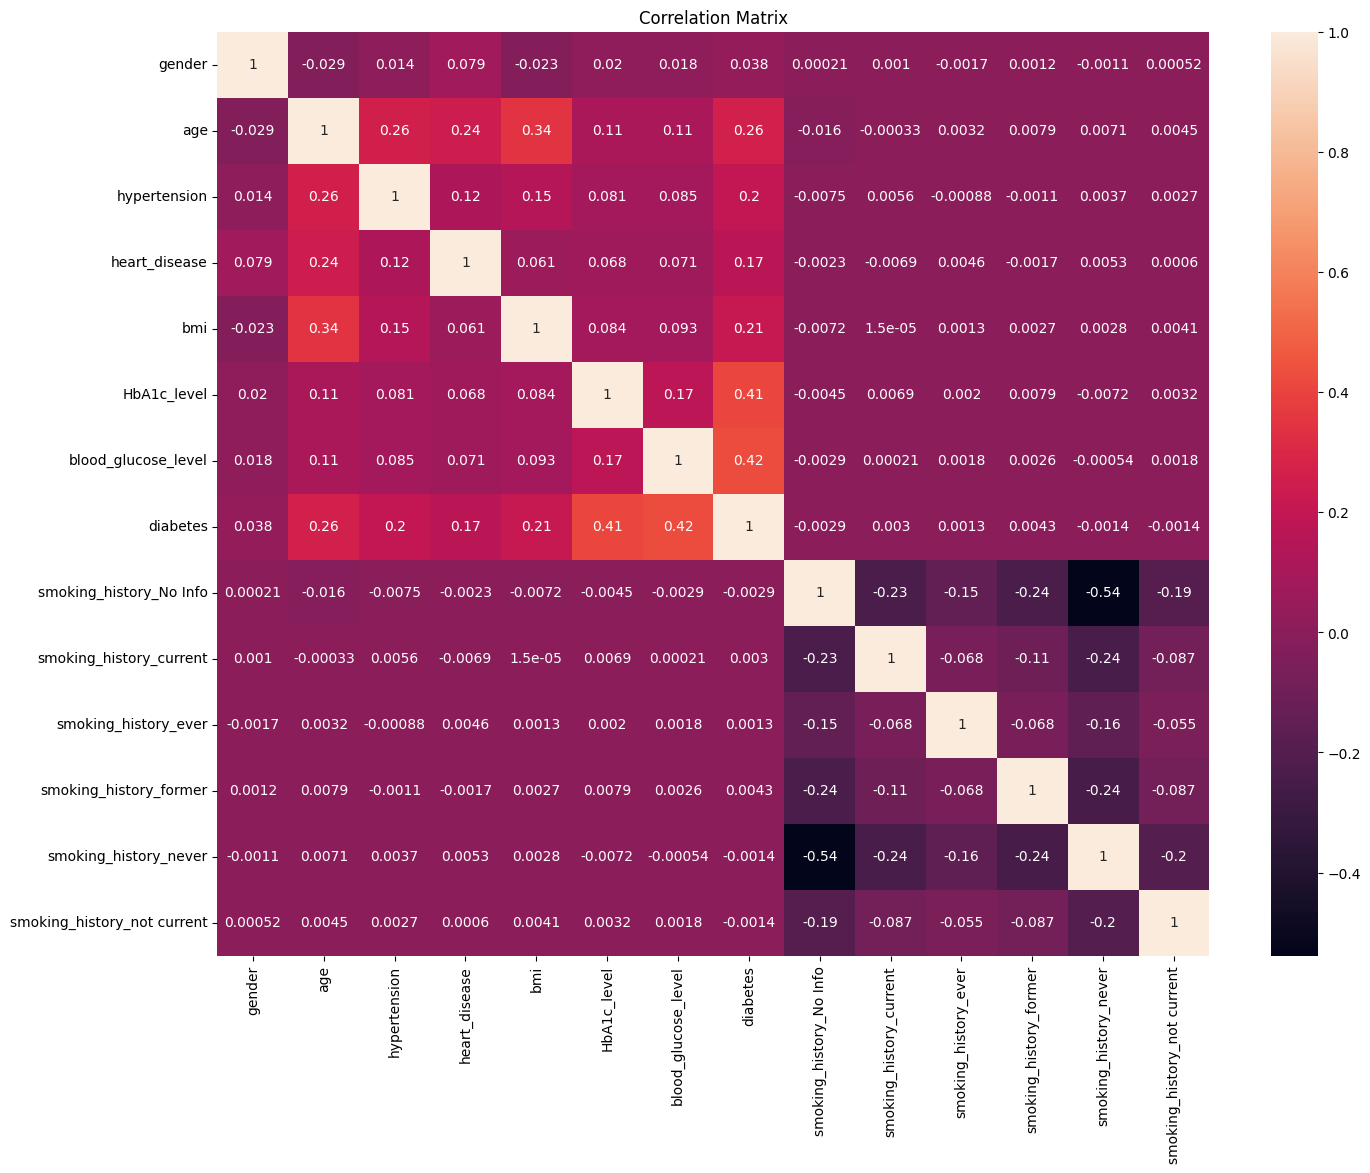

In [19]:
Corr_map = X.corr()
plt.figure(figsize=(16,12))
sns.heatmap(Corr_map, annot=True, cmap='rocket')
plt.title('Correlation Matrix')
plt.show()

In [21]:

df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

x = df.drop(columns = ['diabetes']).values
y = df['diabetes'].values


In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

In [34]:
train_data = pd.concat([pd.DataFrame(x_train, columns = df.drop(columns = ['diabetes']).columns), pd.Series(y_train, name = 'target')],
                       axis = 1)
majority_class = train_data[train_data['target'] == 0]
minority_class = train_data[train_data['target'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace = True, n_samples = len(majority_class), random_state = 42)

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled])
print(balanced_data)
# Separate features and target variable for the balanced dataset
X_balanced = balanced_data.drop('target', axis = 1)
y_balanced = balanced_data['target']


       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         1.0  43.0           0.0            0.0              0.0  27.32   
1         1.0  47.0           0.0            0.0              4.0  24.90   
3         0.0  21.0           0.0            0.0              0.0  29.26   
4         0.0  59.0           0.0            0.0              3.0  30.93   
6         0.0  37.0           0.0            0.0              4.0  25.53   
...       ...   ...           ...            ...              ...    ...   
33686     1.0  66.0           0.0            0.0              3.0  28.33   
64639     0.0  80.0           0.0            0.0              4.0  27.32   
20551     1.0  55.0           0.0            1.0              2.0  30.83   
40639     1.0  80.0           0.0            0.0              4.0  26.95   
7477      0.0  80.0           0.0            1.0              4.0  19.99   

       HbA1c_level  blood_glucose_level  target  
0              6.5                100

## Create an Evaluate Function to give all metrics after model Training

In [35]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [47]:
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(),
    "XGBClassifier":XGBClassifier(),
    "Naive Bayes": GaussianNB(),
}

Model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_balanced.values, y_balanced.values)

    #make prdictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred )
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Model performance for Training set
- Root Mean Squared Error: 0.2220
- Mean Absolute Error: 0.0493
- R2 Score: 0.3848
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3095
- Mean Absolute Error: 0.0958
- R2 Score: -0.1790


Model performance for Training set
- Root Mean Squared Error: 0.0256
- Mean Absolute Error: 0.0007
- R2 Score: 0.9918
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2225
- Mean Absolute Error: 0.0495
- R2 Score: 0.3906


Model performance for Training set
- Root Mean Squared Error: 0.0256
- Mean Absolute Error: 0.0007
- R2 Score: 0.9918
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1955
- Mean Absolute Error: 0.0382
- R2 Score: 0.5298




C:\Users\ryan_\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model performance for Training set
- Root Mean Squared Error: 0.3088
- Mean Absolute Error: 0.0953
- R2 Score: -0.1901
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3088
- Mean Absolute Error: 0.0954
- R2 Score: -0.1735


Learning rate set to 0.080345
0:	learn: 0.5056834	total: 195ms	remaining: 3m 15s
1:	learn: 0.3895750	total: 305ms	remaining: 2m 32s
2:	learn: 0.3200869	total: 422ms	remaining: 2m 20s
3:	learn: 0.2842309	total: 576ms	remaining: 2m 23s
4:	learn: 0.2565912	total: 771ms	remaining: 2m 33s
5:	learn: 0.2425255	total: 961ms	remaining: 2m 39s
6:	learn: 0.2295495	total: 1.23s	remaining: 2m 54s
7:	learn: 0.2226050	total: 1.51s	remaining: 3m 7s
8:	learn: 0.2176009	total: 1.63s	remaining: 2m 59s
9:	learn: 0.2124441	total: 1.88s	remaining: 3m 6s
10:	learn: 0.2094690	total: 2.01s	remaining: 3m
11:	learn: 0.2069263	total: 2.21s	remaining: 3m 1s
12:	learn: 0.2037844	total: 2.35s	remaining: 2m 58s
13:	learn: 0.2016554	total: 2.59s	remain

## Decision Tree

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)

In [34]:
rfc.fit(X_balanced,y_balanced)

RandomForestClassifier(n_estimators=200)

In [35]:
predictions = rfc.predict(x_test)

C:\Users\ryan_\.conda\envs\Streamlit\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     26266
           1       0.85      0.70      0.77      2573

    accuracy                           0.96     28839
   macro avg       0.91      0.84      0.87     28839
weighted avg       0.96      0.96      0.96     28839



In [38]:
print(confusion_matrix(y_test,predictions))

[[25941   325]
 [  773  1800]]


# Web Application

In [39]:
import streamlit as st
from PIL import Image

st.write(""" #Screening Application for Diabetes""")

image = Image.open('c:/Users/ryan_/Downloads/diabetes-528678_640.jpg')
st.image(image, use_column_width=True)

2024-02-01 02:42:46.568 
  command:

    streamlit run C:\Users\ryan_\.conda\envs\Streamlit\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [40]:
def get_user_input():
    gender = st.sidebar.slider('Sex', )
    age = st.sidebar.slider('Your Age', )
    

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96128 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  int32  
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  int32  
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
 9   category             96128 non-null  object 
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 9.3+ MB
